In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
with open ("data/formatted.pkl","rb") as f:
    df = pickle.load(f)

In [17]:
tis = [x for y in list(df["frames"]) for x in y]
c = Counter(tis)

In [22]:
print(c.most_common(110))

[(925673, 11), (925674, 11), (925675, 11), (925676, 11), (925677, 11), (925678, 11), (925679, 11), (925680, 11), (925681, 11), (925682, 11), (925683, 11), (925684, 11), (925685, 11), (925686, 11), (925687, 11), (925688, 11), (925689, 11), (925690, 11), (925691, 11), (925692, 11), (925693, 11), (925694, 11), (925695, 11), (925696, 11), (925697, 11), (925698, 11), (925699, 11), (925700, 11), (925701, 11), (925702, 11), (925117, 10), (925118, 10), (925119, 10), (925120, 10), (925121, 10), (925122, 10), (925123, 10), (925124, 10), (925125, 10), (925126, 10), (925127, 10), (925128, 10), (925129, 10), (925130, 10), (925131, 10), (925132, 10), (925133, 10), (925134, 10), (925135, 10), (925136, 10), (925137, 10), (925138, 10), (925139, 10), (925140, 10), (925141, 10), (925142, 10), (925143, 10), (925144, 10), (925145, 10), (925146, 10), (925147, 10), (925148, 10), (925149, 10), (925150, 10), (925151, 10), (925152, 10), (925153, 10), (925154, 10), (925155, 10), (925156, 10), (925157, 10), (9251

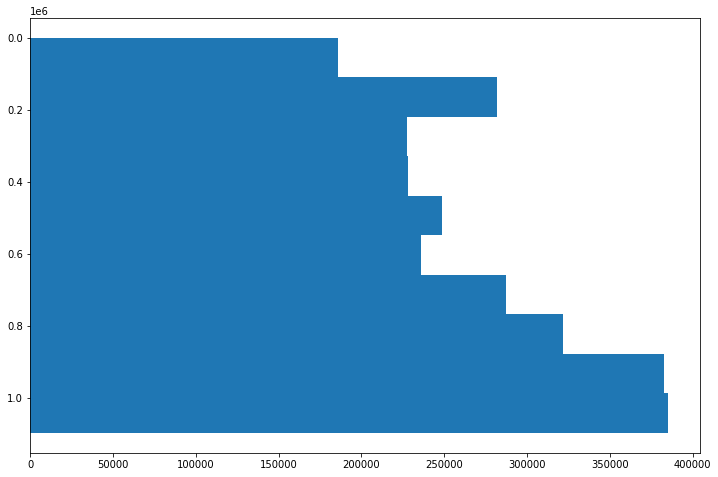

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(tis,orientation="horizontal")



In [3]:
#Checking if the df contains any null- or missing values

print(" \nshow the boolean Dataframe : \n\n", df.isnull())
  
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
show the boolean Dataframe : 

           x      y    euc  d_light  light_color  frames  class  cluster  \
0     False  False  False    False        False   False  False    False   
1     False  False  False    False        False   False  False    False   
2     False  False  False    False        False   False  False    False   
3     False  False  False    False        False   False  False    False   
4     False  False  False    False        False   False  False    False   
...     ...    ...    ...      ...          ...     ...    ...      ...   
3808  False  False  False    False        False   False  False    False   
3809  False  False  False    False        False   False  False    False   
3810  False  False  False    False        False   False  False    False   
3811  False  False  False    False        False   False  False    False   
3812  False  False  False    False        False   False  False    False   

      direction  
0         False  
1         False  
2         F

In [ ]:
#most cars drive straight
df["direction"].describe()

In [7]:
#Which clusters go where?
cluster_directions = df.groupby(["direction","cluster"])
cluster_directions.size()

direction  cluster
left       2          191
           3          200
           5          106
           9          290
right      0          290
           6          123
           7          172
           10         267
straight   1          315
           4          769
           8          386
           11         704
dtype: int64

In [8]:
#Going to plot the counts of each cluster
counts_clu = [df[df["cluster"]==i].shape[0] for i in range(len(np.unique(df["cluster"])))]
x_clu = np.unique(df["cluster"])
y_clu = np.asarray(counts_clu)

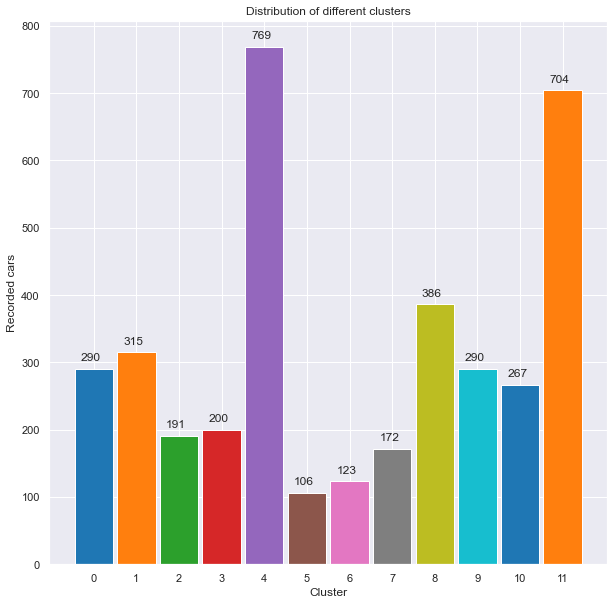

In [9]:
col = sns.color_palette()
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_clu,y_clu,color=col, tick_label=[i for i in np.unique(df["cluster"])],width=.9)
plt.title("Distribution of different clusters")
ax.set_xlabel('Cluster')
ax.set_ylabel('Recorded cars')
for index,data in enumerate(y_clu):
    plt.text(x=index-.3 , y =data+12 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.show()

In [10]:
#Going to plot the couns of each direction that is driven
counts_dir = [df[df["direction"]==np.unique(df["direction"])[i]].shape[0] for i in range(0,3)]
x_dir = np.unique(df["direction"])
y_dir = np.asarray(counts_dir)

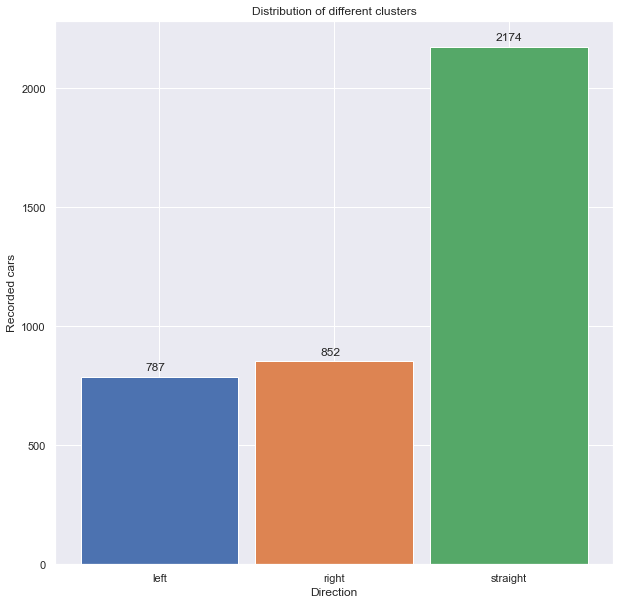

In [11]:
col = sns.color_palette()
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_dir,y_dir,color=col, tick_label = [np.unique(df["direction"])[i] for i in range(0,3)],width=.9)
plt.title("Distribution of different clusters")
ax.set_xlabel('Direction')
ax.set_ylabel('Recorded cars')
for index,data in enumerate(y_dir):
    plt.text(x=index-0.08 , y =data+25 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.show()

<AxesSubplot:ylabel='Density'>

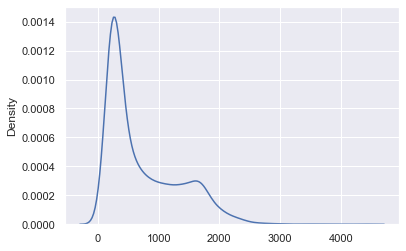

In [12]:
#Density plot of x values
col = sns.color_palette()
xdens = [len(row['x']) for _, row in df.iterrows()]
sns.kdeplot(xdens)

In [11]:
#Getting number of frames recorded where the traffic light is one of the 4 colors 
#a = [x for y in df["frames"]for x in y]
#b = [x for y in df["light_color"]for x in y]
#c = list(zip([x for y in df["light_color"]for x in y],[x for y in df["frames"]for x in y]))
#counter = [Counter(elem[0]) for elem in c]
#final = [counter[i] for i in range(len(counter))]

In [13]:
counter = [Counter(elem[0] for elem in list(zip([x for y in df["light_color"]for x in y],[x for y in df["frames"]for x in y])))[i] for i in range(4)]


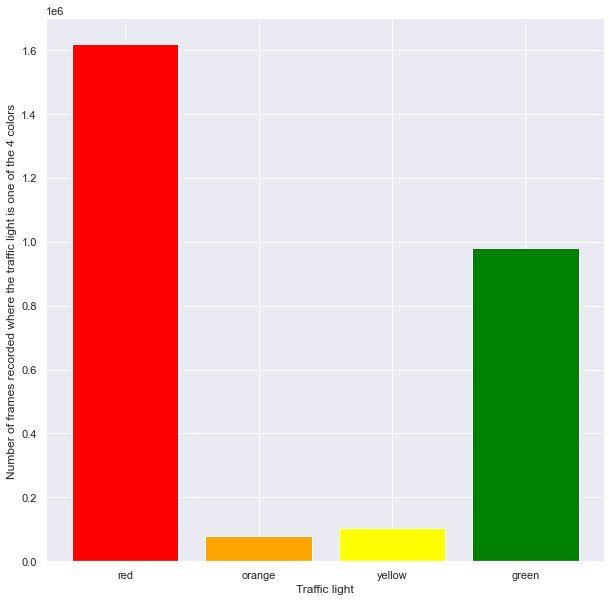

In [14]:
col = sns.color_palette()
colors = ["red","orange","yellow","green"]
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(colors,counter,color=colors)
ax.set_xlabel('Traffic light')
ax.set_ylabel('Number of frames recorded where the traffic light is one of the 4 colors ')

plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

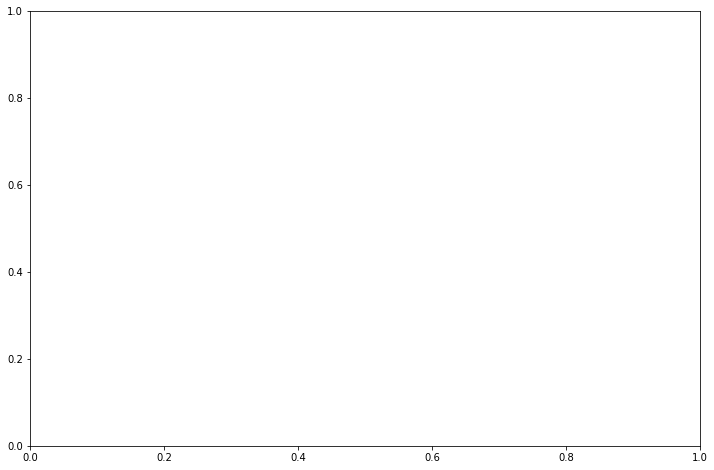

In [25]:
fig, axs = plt.subplots(1, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs.boxplot(df["light_color"][df["cluster"]==1])
#axs = axs.ravel()

plt.show()

In [18]:
df["frames"][df["cluster"]==1]

30      [20327, 20328, 20329, 20330, 20331, 20332, 203...
49      [29740, 29741, 29742, 29743, 29744, 29745, 297...
51      [30576, 30577, 30578, 30579, 30580, 30581, 305...
55      [34584, 34585, 34586, 34587, 34588, 34589, 345...
82      [45533, 45534, 45535, 45536, 45537, 45538, 455...
                              ...                        
3770    [1087587, 1087588, 1087589, 1087590, 1087591, ...
3784    [1090260, 1090261, 1090262, 1090263, 1090264, ...
3790    [1091877, 1091878, 1091879, 1091880, 1091881, ...
3803    [1093980, 1093981, 1093982, 1093983, 1093984, ...
3812    [1095986, 1095987, 1095988, 1095989, 1095990, ...
Name: frames, Length: 315, dtype: object

# ---------------------------------------------------------------------------------------
# Clustering and outlier analysis can be found in a seperate file
# ---------------------------------------------------------------------------------------

### Outliers are removed by clustering all the data using HDBscan, and then using the HDBscan outlier detection to detect and remove outliers in each cluster